In [2]:
import tensorflow as tf
import numpy as np
import os


2023-03-12 02:52:28.712427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
loaded_model = tf.saved_model.load('my_model')

2023-03-12 00:21:48.881914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
h5_loaded_model_prop = tf.keras.models.load_model('best_model_glass_props.h5')

2023-03-12 02:52:48.570117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
h5_loaded_model = tf.keras.models.load_model('best_model.h5')

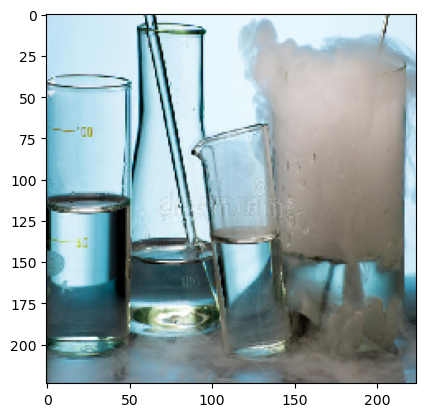

In [5]:
import matplotlib.pyplot as plt
uploaded_file = "Extracted/Image616.jpg"
uploaded_file = "random_beaker_test.jpg"
uploaded_file = "orange_test.png"
uploaded_file = "sugartest.jpeg"
uploaded_file = "more_sugar.png"
uploaded_file = "chemistry.jpg"
uploaded_file = "suspension.jpg"
uploaded_file = "vapor.jpg"
img = tf.keras.preprocessing.image.load_img(uploaded_file, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img / 255.0
img = img.reshape(1, 224, 224, 3)
plt.imshow(img[0])
# img

In [6]:
pred = h5_loaded_model.predict(img)
pred = (pred > 0.2).astype(int)
pred

1/1 [==============================] - 3s 3s/step


array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [11]:
pred_prop = h5_loaded_model_prop.predict(img)
pred_prop = (pred_prop > 0.5).astype(int)
pred_prop

1/1 [==============================] - 0s 299ms/step


array([[0, 0, 0, 1, 0]])

In [131]:
list_y = [[], ['Filled'], ['Foam'], ['Foam', 'Filled'], 
['Foam', 'Solid', 'Filled'], 
['Foam', 'Solid', 'Granular', 'Powder', 'Filled'], 
['Foam', 'Solid', 'Powder'], ['Foam', 'Solid', 'Powder', 'Filled'], 
['Liquid'], ['Liquid', 'Filled'], ['Liquid', 'Filled', 'Solid'], 
['Liquid', 'Foam', 'Filled'], 
['Liquid', 'Foam', 'Gel', 'Solid', 'Filled'], 
['Liquid', 'Foam', 'Solid', 'Filled'], 
['Liquid', 'Foam', 'Solid', 'Granular', 'Filled'], 
['Liquid', 'Foam', 'Solid', 'Powder', 'Filled'], ['Liquid', 'Foam', 'Vapor'], 
['Liquid', 'Gel', 'Filled'], ['Liquid', 'Gel', 'Solid'], 
['Liquid', 'Gel', 'Solid', 'Filled'], 
['Liquid', 'Gel', 'Solid', 'SolidLargChunk', 'Filled'], 
['Liquid', 'Granular', 'Filled'], ['Liquid', 'Solid'], 
['Liquid', 'Solid', 'Filled'], 
['Liquid', 'Solid', 'Granular', 'Filled'], 
['Liquid', 'Solid', 'Other Material', 'Filled'], 
['Liquid', 'Solid', 'Powder', 'Filled'], 
['Liquid', 'Solid', 'SolidLargChunk', 'Filled'], ['Liquid', 'Suspension'], 
['Liquid', 'Suspension', 'Filled'], 
['Liquid', 'Suspension', 'Foam', 'Filled'], 
['Liquid', 'Suspension', 'Foam', 'Gel', 'Filled'], 
['Liquid', 'Suspension', 'Foam', 'Solid', 'Filled'], 
['Liquid', 'Suspension', 'Foam', 'Solid', 'Powder', 'Filled'], 
['Liquid', 'Suspension', 'Gel', 'Filled'], 
['Liquid', 'Suspension', 'Gel', 'Solid', 'Filled'], 
['Liquid', 'Suspension', 'Gel', 'Solid', 'Powder'], 
['Liquid', 'Suspension', 'Gel', 'Solid', 'Powder', 'Filled'], 
['Liquid', 'Suspension', 'Solid'], ['Liquid', 'Suspension', 'Solid', 'Filled'], 
['Liquid', 'Suspension', 'Solid', 'Granular', 'Filled'], 
['Liquid', 'Suspension', 'Solid', 'Granular', 'Powder', 'Filled'], 
['Liquid', 'Suspension', 'Solid', 'Powder'], 
['Liquid', 'Suspension', 'Solid', 'Powder', 'Filled'], 
['Liquid', 'Suspension', 'Solid', 'Powder', 'Other Material', 'Filled'], 
['Liquid', 'Suspension', 'Solid', 'Powder', 'SolidLargChunk', 'Filled'], 
['Liquid', 'Suspension', 'Solid', 'SolidLargChunk', 'Filled'], 
['Liquid', 'Suspension', 'Vapor'], ['Liquid', 'Vapor'], 
['Solid'], ['Solid', 'Filled'], ['Solid', 'Granular'], 
['Solid', 'Granular', 'Filled'], 
['Solid', 'Granular', 'Powder', 'Filled'], 
['Solid', 'Granular', 'SolidLargChunk', 'Filled'], 
['Solid', 'Other Material', 'Filled'], ['Solid', 'Powder'], 
['Solid', 'Powder', 'Filled'],
['Solid', 'Powder', 'SolidLargChunk', 'Filled'],
['Solid', 'SolidLargChunk', 'Filled'], 
['Solid', 'SolidLargChunk', 'Filled'],
['Solid', 'SolidLargChunk', 'Other Material', 'Filled'],
['Vapor']]



In [132]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(list_y)
text_labels = mlb.inverse_transform(pred)

In [133]:
text_labels

[('Filled', 'Liquid')]

In [12]:
list_y_prop = [[], ['Opaque'], ['SemiTrans'],['SemiTrans', 'Opaque'] ,['Transparent'] ,['Transparent', 'DisturbeView'],['VesselInsideVessel', 'Opaque'],['VesselInsideVessel', 'SemiTrans'],['VesselInsideVessel', 'Transparent']]

from sklearn.preprocessing import MultiLabelBinarizer
mlb_prop = MultiLabelBinarizer()
mlb_prop.fit(list_y_prop)
text_labels_prop = mlb_prop.inverse_transform(pred_prop)
text_labels_prop

[('Transparent',)]

In [ ]:
pred_prop = h5_loaded_model_prop.predict(img)
# print(pred_prop)
st.write(pred_prop)
pred_prop = (pred_prop > 0.2).astype(int)
mlb_prop = MultiLabelBinarizer()
mlb_prop.fit(list_y_prop)

text_labels = mlb.inverse_transform(pred) + mlb_prop.inverse_transform(pred_prop)
if len(text_labels[0]) == 0:
    st.write('No labels found')
for label in text_labels[0]:
    st.write(f'- {label}')